In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
import time

In [147]:
#To print the list/array formatted as string
def convert_words_to_full_text(s): 
    new = "" 
    for x in s: 
        new += x  
    return new 

#Used in LA
def adding_extra_blank_space_to_right(M, s):
    if(len(s)<M):
        count = 0;
        temp_str="";
        for i in range(0,(M-len(s))):
            temp_str+=' ';
        s=s+temp_str
    return (s);

#Used in RA
def adding_extra_blank_space_to_left(M, s):
    if(len(s)<M):
        count = 0;
        temp_str = "";
       
        for i in range(0,(M-len(s))):
            temp_str+=' ';
        
        s= temp_str+s;
    return s;

#Used in CA
def adding_extra_blank_space_to_center(M, s):
    s = s.rstrip().lstrip();
    amount_of_blank = (M - len(s))/2;
    
    if(len(s)<M):
        count = 0;
        temp_str = "";
       
        for i in range(0,amount_of_blank):
            temp_str+=' ';
        
        s= temp_str+s+temp_str;
    return s;


def get_lenght_array(array):
    l = [];
    for i in range(0,len(array)):
        l.append(len(array[i]))
    return l;

def cost_funcion_based_on_total_number_of_additional_blank_space_LA(M, l, input_text, aligned):
    #trim the string: We will obtain the word1+word2+thespacebetween rstrip()
    #Subtract string - trimString = numberAdditionalBlankSpace.
    c=0;
    
    #aligned-1: ignore last line. We don't need to calculate the last line since it will have is most cases
    #bigger number of additional space.
    for n in range(0,len(aligned)-1):
        total_words_separated_by_one_blank_space = aligned[n].rstrip(); #i+j
        total_additional_blank_space = (len(aligned[n]) - len(total_words_separated_by_one_blank_space));
         
        c+= (total_additional_blank_space);
    
    c= (c)**3;
    return c;


def cost_funcion_based_on_total_number_of_additional_blank_space_RA(M, l, input_text, aligned):
    #left trim the string: We will obtain the word1+word2+thespacebetween lstrip()
    #Subtract string - lefttrimString = numberAdditionalBlankSpace.
    c=0;
    
    #aligned-1: ignore last line. We don't need to calculate the last line since it will have is most cases
    #bigger number of additional space.
    for n in range(0,len(aligned)-1):
        total_words_separated_by_one_blank_space = aligned[n].lstrip() #i+j
        total_additional_blank_space = len(aligned[n]) - len(total_words_separated_by_one_blank_space);
 
        c+= total_additional_blank_space;
    
    c= (c)**3;
    return c;

def cost_funcion_based_on_total_number_of_additional_blank_space_CA(M, l, input_text, aligned):
    c=0;
    
    #aligned-1: ignore last line. We don't need to calculate the last line since it will have is most cases
    #bigger number of additional space.
    for n in range(0,len(aligned)-1):
       # aligned[n].replace("\n", "")
        total_words_separated_by_one_blank_space = aligned[n].replace("\n", "").lstrip().rstrip() #i+j
        total_additional_blank_space = len(aligned[n].replace("\n", "")) - len(total_words_separated_by_one_blank_space);
 
        c+= total_additional_blank_space;
    
    c= (c)**3;
    return c;


#M is line width (maximum no. of characters that can fit in a line)
#l[] is the size of each word of the array/list
#input_text is the array/list of words.
def greedy_left_alignment(M, l, input_text):   
    if (len(l) == 0):
        return 0;
    aligned = []
    count = 0;
    string='';
    for i in range(0, len(l)):
        count += l[i];

        if count<=M and ((len(string)+l[i])<=M): 
            string+=input_text[i]+" ";

        else:
            string = adding_extra_blank_space_to_right(M, string) 
            aligned.append(string+"\n");
            count = 0;
            
            string=input_text[i]+" ";
        
        #If it's the end the array
        if(i == (len(l)-1)):
            string = adding_extra_blank_space_to_right(M, string)  
            aligned.append(string)

    return aligned;  
        
    
#M is line width (maximum no. of characters that can fit in a line)
#l[] is the size of each word of the array/list
#input_text is the array/list of words.
def greedy_right_alignment(M, l, input_text):
    aligned = []
    if (len(l) == 0):
        return 0;
   
    else:
        count = 0;
        string='';
        for i in range(0, len(l)):
            count += l[i];
        
            if count<=M and ((len(string)+l[i])<=M):
                string+=input_text[i]+" ";
                
            elif l[i]<=M:
                string = adding_extra_blank_space_to_left(M, string.rstrip());

                aligned.append(string+"\n");
                string=input_text[i]+" ";
                 
                count = l[i];
                
             #If it's the end the array
            if(i == (len(l)-1)):
                string = adding_extra_blank_space_to_left(M, string.rstrip())
                aligned.append(string)

    return aligned;


#M is line width (maximum no. of characters that can fit in a line)
#l[] is the size of each word of the array/list
#input_text is the array/list of words.
def greedy_center_alignment(M, l, input_text):
    aligned = []
    if (len(l) == 0):
        return 0;
   
    else:
        count = 0;
        string='';
        for i in range(0, len(l)):
            count += l[i];
             
            if count<=M and (((len(string)+l[i]) % 2)==0 and (len(string)+l[i])<=M):
                string+=input_text[i]+" ";
                
            elif l[i]<=M:
                string = adding_extra_blank_space_to_center(M, string);

                aligned.append(string+"\n");
                string=input_text[i]+" ";
                 
                count = l[i];
                
             #If it's the end the array
            if(i == (len(l)-1)):
                string = adding_extra_blank_space_to_center(M, string)
                aligned.append(string)

    return aligned; 



def string_result(index, size, cost, approach, function, time, M):
    s = (index,size, cost,approach,function, str(time), str(M));
    return s;

# Reading Data


In [148]:
#Source: https://drive.google.com/open?id=199kBrawlwjyMDYHiao6LY9VjPm01osxxkrk2lCV3hYQ

columns = ['Index', 'Size', 'Costs', 'Approach', 'Function', 'Time', 'M']

M = [10, 15, 20, 25, 30, 35, 40, 45, 50]


#input_data_(word_range_size)
input_data_1_4 = [['qqbz', 'b', 'rjs', 's', 'tlk', 'ooi', 'idod', 'il', 'qw', 'xbqx', 'j', 'b', 'ge', 'gobc', 'i'],
                 ['cm', 'fo', 'uz', 'vufo', 'z', 'gzuc', 'lyw', 'kxlc', 'gk', 'qp', 'nwg', 'tm', 'c', 'u', 'nl', 'ga', 'nes', 'q', 'fdij', 'w', 'wcw', 'pf', 'l', 'aj', 'o', 'cey', 'hg', 'thso', 'fcy', 'z', 'rw'],
                 ['wy', 'dpt', 'ptw', 's', 'pim', 'b', 'ifzb', 'van', 'gybr', 'ef', 'hvng', 'asz', 'uvl', 'fo', 'go', 'drkd', 'nkl', 'b', 'jdqp', 'sz', 'u', 'dgdv', 'jk', 'q', 'ql', 'fbk', 'a', 'fu', 'c', 'crx', 'lt', 'dsy', 'nkw', 'zykp', 's', 'q', 'zh', 'ih', 'no', 'r', 'cgsn', 'vtgg', 'omj', 'q'],
                 ['tqg', 'r', 'sig', 'xylu', 'kd', 'an', 'iqgo', 'aj', 'xh', 'ed', 'wv', 'rsmi', 'kpup', 'tt', 'jckd', 'p', 'tp', 'mfyq', 'vf', 't', 'hli', 'dahz', 's', 'kipw', 'fz', 'b', 'e', 'vun', 'mao', 'xfc', 'r', 'yn', 'y', 'tw', 'yx', 'avty', 'ti', 'wm', 'a', 'lk', 'scz', 'jy', 'f', 'zxzl', 'setj', 'h', 'bf', 'tpx', 'wxqi', 'qvav', 'wdz', 'hn', 'sof', 'ty', 'vwb', 'h', 'kc', 'kx', 'v'],
                 ['n', 'gsd', 'g', 'mrl', 'pdd', 'i', 'jcri', 'tljj', 'bz', 'gcne', 'trr', 'kh', 'k', 'lhwx', 'fkk', 'lri', 'w', 'm', 'v', 'zumn', 'hjwx', 'j', 'jq', 'tq', 'j', 'la', 'lxn', 'w', 'f', 'ta', 'wjn', 'l', 'aoiy', 'wkmz', 'omd', 'a', 'giiz', 'se', 'wmqa', 'p', 'ls', 'hk', 'kkzm', 'v', 'rw', 'sh', 'bnf', 'cd', 'c', 'hjt', 'so', 'tzzu', 'o', 'xi', 'slvv', 'j', 'hka', 'gdq', 'yx', 'o', 'g', 'ejrf', 'xiyu', 'am', 'p', 'at', 'l', 'us', 'nm', 'fo', 'v', 'p', 'vouw', 'ytk', 'k', 'kpgh'],
                 ['bwoj', 'r', 'yim', 'yk', 'alu', 'fzu', 'q', 'mrrb', 'fve', 'moyb', 'ssl', 'jm', 'xxcl', 'prhv', 'jzj', 'sq', 'zzdj', 'xhe', 'chpm', 't', 'b', 'hcf', 'gqfm', 'v', 'jdd', 'akh', 'l', 'vvde', 'r', 'dij', 'f', 'h', 'earj', 'mac', 'ghe', 'fj', 'zo', 'ibd', 'i', 'idfw', 'brfw', 'seqv', 'eq', 'kk', 'm', 'icqa', 'r', 'lf', 'xzyy', 'hxq', 'zwg', 'q', 'p', 'ergv', 'ngl', 'alqk', 'hd', 'y', 'px', 'imb', 'fwt', 'ty', 'crnr', 'f', 's', 'g', 'vhr', 'hs', 'm', 'qdib', 'bn', 'rpzg', 'xr', 'x', 'cyam', 'l', 'k', 'zkz', 'i', 'oev', 'uea', 'm', 'lcuc', 'c', 'szv', 'fl']]


input_data_1_5 =[['ur', 'twcov', 'ylvu', 'ci', 'gs', 'ezah', 'gjrt', 'vyphd', 'mswzg', 'lqz', 'wz', 'v'],
                ['kg', 'utbu', 'jeh', 'b', 'bgpom', 'qhvo', 'merbj', 'z', 'jq', 'rt', 'wn', 'md', 'rjtl', 'c', 'csx', 'kkviz', 'wyo', 'i', 'ornp', 'mrf', 'vs', 'yrwcb', 'kl', 'geyk', 'u', 'c', 'ag'],
                ['pka', 'cf', 'iuzpv', 'eucbd', 'qik', 'qs', 'yy', 'ngssc', 'ko', 'pjn', 'auz', 'cb', 'cu', 'tgp', 'ro', 'n', 'riv', 'oex', 'bmk', 'lsjlo', 'j', 'yvu', 'erqbh', 'oomsq', 'qhsdl', 'sq', 'giyp', 'qph', 'kimxh', 'vg', 'm', 'x', 'larma', 'sfa', 'wfooj', 'stn', 'jh'],
                ['spj', 'ce', 'cqazv', 'axfry', 'rgu', 'yysaj', 'ichan', 'pig', 'jdbm', 'w', 'g', 'wl', 'tf', 'y', 'rdyfy', 'pe', 'svob', 'hux', 'rxic', 'f', 'ctss', 'oc', 'aqe', 'umtt', 'c', 'l', 't', 't', 'af', 'bszx', 'x', 'th', 'itt', 'gfaik', 'axhwi', 'iy', 'yjmjy', 'm', 'nvgj', 'd', 'g', 'x', 'ky', 'mk', 'ftsg', 'vwdjf', 'jdcq', 'n', 'twcwk', 'g', 'c', 'gjb', 'nyj', 'p'],
                ['ck', 'iagn', 'rp', 'fs', 'njjt', 'wig', 'f', 'nclby', 'jf', 'iz', 'eb', 'sc', 'ye', 'dquct', 'frym', 'fzkr', 'ksf', 'iid', 'cttxg', 'lt', 'gathg', 'sbwx', 'rny', 'qhq', 'ite', 'm', 'bgsx', 'xmdiq', 'yxn', 'ciqqe', 'p', 'uqgda', 'trrd', 'ugwx', 'r', 'wz', 'fi', 'z', 'wwal', 'yxqz', 'oavdm', 'kt', 'od', 'y', 'tqcvb', 'n', 'fvlhz', 'i', 'fu', 'y', 'avkut', 'cxd', 'zoo', 'nxl', 'kw', 'lp', 'spzil', 'rg', 'ncs', 'ksqr', 'kgfan', 'sa', 'p'],
                ['okd', 'spxvr', 'l', 'cbg', 'nryc', 'dftfl', 'vpj', 's', 't', 'o', 'ayd', 'qzek', 'jhzv', 'xquck', 'g', 'to', 'x', 'araq', 'b', 'libs', 'h', 'fx', 'yvhih', 'oxk', 'cna', 'k', 'aud', 'gvscb', 'kiv', 'qge', 'qrzao', 'ch', 'beqgw', 'lh', 'f', 'u', 'uqxzw', 'kjk', 'fbt', 'sjae', 'qrw', 'ovs', 'rgvi', 'lmr', 'cm', 'lwl', 'u', 'caa', 'eg', 'f', 'sfhd', 'oica', 'oqb', 'i', 'zqn', 'udwx', 'smvr', 'm', 'rlg', 'eryj', 'sqqf', 'ur', 'hee', 'qbdx', 'lrnlk', 'uyo', 'qa', 'l', 'yyzgo', 'bfaxa', 'og', 'ml', 'b', 'na', 'pkc', 'ijr', 'tlg', 'w']]

input_data_1_6 = [['ncuk', 'y', 'nb', 'bbpny', 'fabis', 'uoppxp', 'knssmc', 'txnx', 'ej', 'c', 'naqg'],
                    ['clqwad', 'qmrki', 'hujmvi', 'h', 'ckm', 'gkihhi', 'iwaog', 'wqlplm', 'igao', 'ab', 'exhgfk', 'nus', 'geg', 'kqan', 'sc', 'pli', 'fg', 'xi', 'wn', 'vbqemr', 'x', 'x'],
                    ['tsic', 'hspaq', 'vpgz', 'c', 'pijx', 'y', 'fekmu', 'fjtg', 'oretzr', 'dcjw', 'ldvvuf', 'fg', 'sbsc', 'ngdy', 'smqeuy', 'jzj', 'btlx', 'iffo', 'vvsem', 'fqa', 'hfr', 'bwm', 'xtekp', 'zrmcz', 'pq', 'ng', 's', 'j', 'tbocdu', 'ada', 'm', 'kkka', 'b', 't'],
                    ['zffumo', 'l', 'pwfumh', 'jhxkv', 'bkqdvp', 'efvd', 'lxxxbx', 'yzdrs', 'drzk', 'gnzrr', 'drbet', 'v', 'sk', 'g', 'kxbvvk', 'qgnni', 'cov', 'e', 'qykqle', 'w', 'ej', 'fjmosf', 'ub', 'y', 'jxv', 'wtrm', 'jlorsn', 'r', 'yojal', 'c', 'rwgu', 'x', 'mo', 'aofqm', 'xijj', 'mp', 't', 'xvg', 'tyyd', 'khr', 'd', 'qabybr', 'cgtner', 'kyplb'],
                    ['n', 'be', 'eexq', 'pmd', 'k', 'a', 'zg', 'zhu', 'h', 'eb', 'gsdizk', 'hnype', 'h', 'wkxyp', 'kiwd', 'pwq', 'lbku', 'tsyksx', 'ls', 'okgtw', 'lmiwz', 'p', 'acpnlf', 'gudw', 'sk', 'f', 'khproy', 'udka', 'm', 'q', 'pt', 'qt', 'zlub', 'of', 'hkxm', 'xt', 'dbz', 'bklc', 'qtcos', 'p', 'gi', 'cpme', 'grddaf', 'nl', 'pr', 'w', 'cqt', 'h', 'tlaibo', 'iebw', 'dkrgug', 'ed', 'dbfjv', 'zfa', 'glxbk', 'crhm', 'x', 'qup', 'zefhg', 'wmaxc'],
                    ['b', 'fwlut', 'yr', 'so', 'phcgc', 'myf', 'dgishz', 'bo', 'leshyy', 'gzmtk', 'ksms', 'dicn', 'eibn', 'q', 'oc', 'j', 'o', 'anqcau', 'bc', 'a', 'wqpx', 'mwfiay', 'x', 'cr', 'e', 'vyqmw', 'jqojee', 'zvwuqa', 'zduzie', 'djser', 'yvi', 'tf', 'ffzj', 'pu', 'kjs', 'maf', 'yazct', 'ndxxxn', 'izuus', 'mdp', 'ihtfsy', 'torgv', 'cak', 'gdc', 'qbbqqm', 'awl', 'qxuzd', 'iez', 'keen', 'y', 'i', 'op', 'mfew', 'vyhwrd', 'jnback', 'eomnvg', 'sbtn', 'uxtn', 'gpc', 'pc', 'irtp', 'jzxw', 'hib', 'plu', 'vl', 'j']]


input_data_1_7 = [['pyn', 'nf', 'bcjfop', 'qxeiyy', 'ek', 'ctdtyob', 'efgumr', 'rdoznsm', 'ddo'],
                    ['ksjc', 'kvpwoa', 'hi', 'ezyo', 'er', 'qlgls', 'hvxmws', 'lfgupv', 'karzrrx', 'pfs', 'qdehsyt', 'neiul', 'sq', 'i', 'ibqk', 'lhwel', 'bcscs', 'js', 'k', 'cq', 'q'],
                    ['w', 'nl', 'grwn', 'ybtemk', 'kyxt', 'vum', 'bpo', 'wi', 'azilxpy', 'q', 'guqpj', 'pmgq', 'edecd', 'uf', 'ggtw', 'tszb', 'yurohdr', 'is', 'yjky', 'n', 'rhpfcpb', 'dyuo', 'd', 'pxd', 'bjny', 'dldzhul', 'eax', 'abbw', 'ugdikjb', 'nme', 'pnomie'],
                    ['qk', 'i', 'k', 'ss', 'ake', 'bz', 'gbi', 'av', 'vbfsf', 'mjnxyk', 'dgpgjmf', 'gdiedoc', 'tzkfkx', 'brvkzbz', 'hbwnv', 'opwqcnv', 'ipipbea', 'iyurfcs', 'igumihc', 's', 'zbd', 'y', 'wprxhf', 'ybmbu', 'xpdui', 'dw', 'y', 'wwi', 'xmejvn', 'mv', 'wfjteci', 'gdqezli', 'ddbdfo', 'mcawsk', 'c', 'h', 'tpxj', 'omrtmtm', 'e'],
                    ['qastjgj', 'o', 'kdx', 'wyrop', 'lhh', 'kjgjo', 'ijhzr', 'o', 'mgtuwuq', 'kcpwy', 'rvoydbf', 'pgqplnp', 'ivg', 'lzlcgx', 'yfs', 'aqek', 'flr', 'kwyqy', 'fkios', 'ag', 'uqxj', 'x', 'y', 'velf', 'vi', 'idsne', 'za', 'csdit', 'trwtnfj', 'h', 'bkmnqj', 'w', 'ik', 'wopl', 'haav', 'r', 'iebsc', 'ngex', 'f', 'biswm', 'ufj', 'rrl', 'pshseh', 'uzaz', 'wxjc', 'hnfh', 'etxvh', 'jpxvkjm', 'u', 'uig', 'ednj', 'dga'],
                    ['fbabq', 'umgl', 'jihtiwi', 'xxehknv', 'e', 'yn', 'lwovf', 'tzcgpt', 'xyqwosj', 'pycpziv', 'nkwmfac', 's', 'sjrwtrx', 'jte', 'bjuvzfh', 'hy', 'stct', 'dtgeat', 'zqqb', 'b', 'eweyyxy', 'fmhdkcr', 'xu', 'eooq', 'oknyz', 'uca', 'i', 'niugli', 'm', 'va', 'in', 'hiz', 'r', 'bkahv', 'ras', 'z', 'm', 'xqajvlj', 'n', 'rducw', 'wnejrnj', 'snbdy', 'zq', 'e', 'gkgghpk', 'vtl', 'm', 'vyjva', 'uswu', 'zac', 'tku', 'rliy', 'ocyprvg', 'f', 'zpz', 'icjmwz', 'l', 'ypues', 'ayderkn', 'iy', 'a', 'x']]


input_data_1_8 = [['pg', 'ascowy', 'jis', 'wuvkjqif', 'odwp', 'vnvwwho', 'onp', 'hlijecxt', 'q'],
                ['fuacmv', 'rdwimqha', 'lufyyar', 'iucjtrg', 'vnuzc', 'isdnooy', 'yyidvc', 'yzhiaccq', 'h', 'sklikmg', 'mj', 'fmaqld', 'ydo', 'vauewx', 'n', 'st', 'bs'],
                ['npd', 'zwu', 'zataaxhl', 'nap', 'o', 'vr', 'curo', 'mfpycj', 'owoozeeg', 'xd', 'j', 'yvw', 'upwxbxy', 't', 'julak', 'ojocd', 'l', 'rtxl', 'espni', 'fhewdjsu', 'xgw', 'zhvowi', 'htsa', 'fbp', 'lqnpm', 'aup', 'dgizg', 'txu', 'yshwq', 'yntj'],
                ['zfbjkbsc', 'xalmixgy', 'eb', 'si', 'lq', 'nrbtysq', 'sitx', 'v', 'b', 'wpoboo', 'pl', 'tyumqgk', 'ejwus', 'plrkesgd', 'sexladwr', 'sr', 'a', 'cju', 'rmjflg', 'hfpqism', 'enywahyd', 'wqhxv', 'mrkxyue', 'imcr', 'ems', 'rkvyuta', 'ojrlc', 'qzotuuj', 'sjsn', 'xexdo', 'nqqpfgkb', 'pcasy', 'btd', 'ovjb', 't'],
                ['nrmx', 'ltue', 'uqarwaqw', 's', 'lurfasxa', 'wsp', 'k', 'byuqxw', 'mptp', 'ufcy', 'qs', 'mt', 'kqlcn', 'qxghzy', 'a', 'xwx', 'hqvu', 'lj', 'bbxpukwg', 'rxqoky', 'lvvqiqzf', 'cbnqlpw', 'hszpcgo', 'pcijlb', 'iy', 'x', 'mhuqketq', 'nqndyxhg', 'chsb', 'qutsy', 'baxt', 'tmx', 'nqa', 'xsfvhou', 'vday', 'e', 'g', 'fczewi', 'bbn', 'gxevasi', 'rvsfove', 'qlnvbyy', 'wnl', 'azwrt', 'tviqu', 'c'],
                ['vietxl', 'wcacbtvt', 'rq', 'vmjz', 'hiyw', 'iuxqrnr', 'aqmxcpij', 'rtr', 'w', 'mtttdj', 'j', 'ybwplbgh', 'wtwuctje', 'qqa', 'ihcd', 'qgdfb', 'fvfvsqey', 'go', 'pgorbf', 'zil', 'bzhk', 'dghym', 'i', 'qn', 'naoyntv', 'hzorwjqu', 'xlysxg', 'emxuvfa', 'l', 'rm', 'u', 'f', 'vs', 'qmsv', 'lfylpys', 'ttkt', 'kjab', 'pzfomp', 'huqut', 'nhfoi', 'bxffackl', 'vgvzgubn', 'hdwxi', 'i', 'yvz', 'iduig', 'urc', 'qmo', 'xrrz', 'nhrigfmw', 'bk', 'qt', 'n', 'yx', 'xq', 'ugdnzwp', 'u']]


 ### 1. Greedy Left Alignment

In [149]:
def running_greedy_LA_over_input_data_and_Ms(M, input_data, columns):    
    results_GLA = [];
    index = 1;
    for j in range(len(M)):
        for i in range(0,len(input_data)):
            l = get_lenght_array(input_data[i])

            #Start processing time: 
            start_time = time.time()

            alignedLA= greedy_left_alignment(M[j], l, input_data[i])

            #End processing time: 
            end_time = time.time() - start_time

            cost = cost_funcion_based_on_total_number_of_additional_blank_space_LA(M[j], l, input_data[i], alignedLA);
            results_GLA.append(string_result(index, len(' '.join(input_data[i])), cost, "Greedy", "LA", end_time, M[j]));
            index+=1;
    resultsGLA = pd.DataFrame(results_GLA , index=None, columns=columns)
        
    return resultsGLA

In [150]:
GLA_result_1_4 = running_greedy_LA_over_input_data_and_Ms(M, input_data_1_4, columns)
GLA_result_1_5 = running_greedy_LA_over_input_data_and_Ms(M, input_data_1_5, columns)
GLA_result_1_6 = running_greedy_LA_over_input_data_and_Ms(M, input_data_1_6, columns)
GLA_result_1_7 = running_greedy_LA_over_input_data_and_Ms(M, input_data_1_7, columns)
GLA_result_1_8 = running_greedy_LA_over_input_data_and_Ms(M, input_data_1_8, columns)

In [151]:
#Generate CSVs
GLA_result_1_4.to_csv('resultsGLA_1_4.csv', sep=',' , header=None, index=None)
GLA_result_1_5.to_csv('resultsGLA_1_5.csv', sep=',' , header=None, index=None)
GLA_result_1_6.to_csv('resultsGLA_1_6.csv', sep=',' , header=None, index=None)
GLA_result_1_7.to_csv('resultsGLA_1_7.csv', sep=',' , header=None, index=None)
GLA_result_1_8.to_csv('resultsGLA_1_8.csv', sep=',' , header=None, index=None)

### 2. Greedy Right Alignment

In [152]:
def running_greedy_RA_over_input_data_and_Ms(M, input_data, columns):    

    results_GRA = [];
    
    index = 1;
    for j in range(len(M)):
        for i in range(0,len(input_data)):
            l = get_lenght_array(input_data[i]) 

            #Start processing time: 
            start_time = time.time()

            alignedRA= greedy_right_alignment(M[j], l, input_data[i])

            #End processing time: 
            end_time = time.time() - start_time


            cost = cost_funcion_based_on_total_number_of_additional_blank_space_RA(M[j], l, input_data[i], alignedRA);
            results_GRA.append(string_result(index, len(' '.join(input_data[i])), cost, "Greedy", "RA", end_time, M[j]));
            index+=1;
    resultsGRA = pd.DataFrame(results_GRA , index=None, columns=columns)
    
    return resultsGRA


In [153]:
GRA_result_1_4 = running_greedy_RA_over_input_data_and_Ms(M, input_data_1_4, columns)
GRA_result_1_5 = running_greedy_RA_over_input_data_and_Ms(M, input_data_1_5, columns)
GRA_result_1_6 = running_greedy_RA_over_input_data_and_Ms(M, input_data_1_6, columns)
GRA_result_1_7 = running_greedy_RA_over_input_data_and_Ms(M, input_data_1_7, columns)
GRA_result_1_8 = running_greedy_RA_over_input_data_and_Ms(M, input_data_1_8, columns)

In [154]:
#Generate CSVs
GRA_result_1_4.to_csv('resultsGRA_1_4.csv', sep=',' , header=None, index=None)
GRA_result_1_5.to_csv('resultsGRA_1_5.csv', sep=',' , header=None, index=None)
GRA_result_1_6.to_csv('resultsGRA_1_6.csv', sep=',' , header=None, index=None)
GRA_result_1_7.to_csv('resultsGRA_1_7.csv', sep=',' , header=None, index=None)
GRA_result_1_8.to_csv('resultsGRA_1_8.csv', sep=',' , header=None, index=None)

### 3. Greedy Center Alignment 

In [155]:
def running_greedy_CA_over_input_data_and_Ms(M, input_data, columns):    

    results_GCA = [];
    index = 1;
    for j in range(len(M)):
        for i in range(0,len(input_data)):
            l = get_lenght_array(input_data[i]) 

            #Start processing time: 
            start_time = time.time()

            alignedCA= greedy_center_alignment(M[j], l, input_data[i])

            #End processing time: 
            end_time = time.time() - start_time

            cost = cost_funcion_based_on_total_number_of_additional_blank_space_CA(M[j], l, input_data[i], alignedCA);
            results_GCA.append(string_result(index, len(' '.join(input_data[i])), cost, "Greedy", "CA", end_time, M[j]));
            index+=1;
            
    resultsGCA = pd.DataFrame(results_GCA , index=None, columns=columns)
   
    return resultsGCA

In [156]:
GCA_result_1_4 = running_greedy_CA_over_input_data_and_Ms(M, input_data_1_4, columns)
GCA_result_1_5 = running_greedy_CA_over_input_data_and_Ms(M, input_data_1_5, columns)
GCA_result_1_6 = running_greedy_CA_over_input_data_and_Ms(M, input_data_1_6, columns)
GCA_result_1_7 = running_greedy_CA_over_input_data_and_Ms(M, input_data_1_7, columns)
GCA_result_1_8 = running_greedy_CA_over_input_data_and_Ms(M, input_data_1_8, columns)

In [157]:
#Generate CSVs
GCA_result_1_4.to_csv('resultsGCA_1_4.csv', sep=',' , header=None, index=None)
GCA_result_1_5.to_csv('resultsGCA_1_5.csv', sep=',' , header=None, index=None)
GCA_result_1_6.to_csv('resultsGCA_1_6.csv', sep=',' , header=None, index=None)
GCA_result_1_7.to_csv('resultsGCA_1_7.csv', sep=',' , header=None, index=None)
GCA_result_1_8.to_csv('resultsGCA_1_8.csv', sep=',' , header=None, index=None)

[Text(0,0.5,'Cost'), Text(0.5,0,'Size')]

<Figure size 720x720 with 0 Axes>

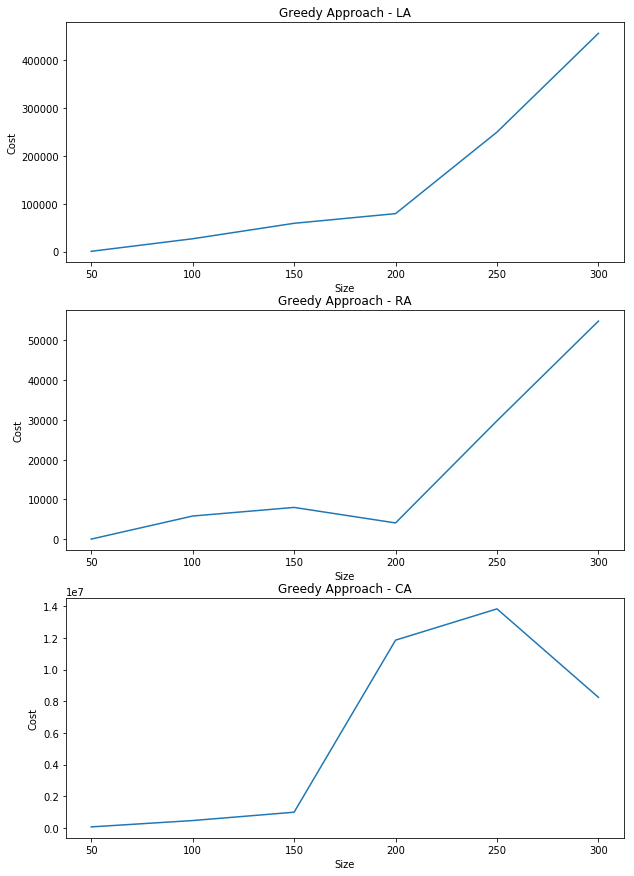

In [158]:
GLA_result_1_4_subset_M_10= GLA_result_1_4.loc[(GLA_result_1_4.M == '10')]
GRA_result_1_4_subset_M_10= GRA_result_1_4.loc[(GRA_result_1_4.M == '10')]
GCA_result_1_4_subset_M_10= GCA_result_1_4.loc[(GCA_result_1_4.M == '10')]


plt.figure(figsize=(10, 10))
fig, (ax1,ax2,ax3) = plt.subplots(3, figsize=(10,15))

ax1.set_title('Greedy Approach - LA')
ax1.plot(GLA_result_1_4_subset_M_10.Size,GLA_result_1_4_subset_M_10.Costs)
ax1.set(xlabel='Size', ylabel='Cost')


ax2.set_title('Greedy Approach - RA')
ax2.plot(GRA_result_1_4_subset_M_10.Size,GRA_result_1_4_subset_M_10.Costs)
ax2.set(xlabel='Size', ylabel='Cost')


ax3.set_title('Greedy Approach - CA')
ax3.plot(GCA_result_1_4_subset_M_10.Size,GCA_result_1_4_subset_M_10.Costs)
ax3.set(xlabel='Size', ylabel='Cost')
